<a href="https://colab.research.google.com/github/dwdsuh/OMOS/blob/master/Text_and_Sequential_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MNIST Exmaple

In [0]:
from keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels)=mnist.load_data()

In [0]:
train_images.shape

(60000, 28, 28)

In [0]:
train_labels.shape

(60000,)

In [0]:
len(train_labels)

60000

In [0]:
train_images[0]

In [0]:
from keras import models
from keras import layers

network=models.Sequential()
network.add(layers.Dense(512, activation='relu', input_dim=28*28))
network.add(layers.Dense(10, activation='softmax'))

In [0]:
network.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_7 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [0]:
network.compile(optimizer='rmsprop', 
                loss='categorical_crossentropy', 
                metrics=['accuracy'])

In [0]:
train_images=train_images.reshape((60000, 28*28))
train_images=train_images.astype('float32')/255
test_images=test_images.reshape((10000, 28*28))
test_images=test_images.astype('float32')/255

In [0]:
#label을 더미변수로 바꾸어준다
#converting labels to dummy variables

from keras.utils import to_categorical

train_labels=to_categorical(train_labels)
test_labels=to_categorical(test_labels)

In [0]:
network.fit(x=train_images, y=train_labels, epochs=5, batch_size=128)

Epoch 1/5
60000/60000 [==============================] - 5s 85us/step - loss: 0.2566 - acc: 0.9246
Epoch 2/5
60000/60000 [==============================] - 2s 34us/step - loss: 0.1040 - acc: 0.9692
Epoch 3/5
60000/60000 [==============================] - 2s 34us/step - loss: 0.0677 - acc: 0.9796
Epoch 4/5
60000/60000 [==============================] - 2s 34us/step - loss: 0.0495 - acc: 0.9850
Epoch 5/5
60000/60000 [==============================] - 2s 34us/step - loss: 0.0366 - acc: 0.9891


In [0]:
test_loss, test_acc=network.evaluate(test_images, test_labels)
print('test_acc:', test_acc)

10000/10000 [==============================] - 1s 54us/step
test_acc: 0.9779


In [0]:
##Concept of Tensor
##Concept of datatype

In [0]:
import numpy as np

In [0]:
x=np.array([10,1,2,4,5])

In [0]:
x

array([10,  1,  2,  4,  5])

In [0]:
x.ndim

1

In [0]:
x=np.array([[[2,3,4,4],
            [3,4,5,6],
            [4,5,6,3]],
            [[2,3,4,4],
            [3,4,5,6],
            [4,5,6,3]]])
          

In [0]:
x.ndim

3

In [0]:
a=np.array([1,2,3,4,5])
a.shape

(5,)

In [0]:
from keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels)=mnist.load_data()

In [0]:
print(train_images.ndim)
print(train_images.shape)
print(train_images.dtype)

3
(60000, 28, 28)
uint8


In [0]:
digit=train_images[4]

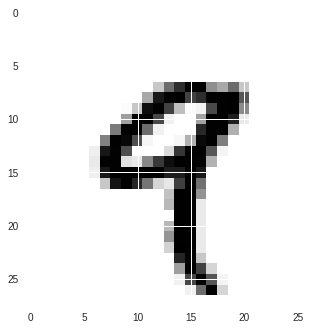

In [0]:
import matplotlib.pyplot as plt
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

# IMDB dataset

##importing the dataset

In [0]:
from keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels)= imdb.load_data(num_words=10000)

In [0]:
print(len(train_data[0]))
print(len(train_labels))
train_labels[0]

218
25000


1

In [0]:
max([max(i) for i in train_data])

9999

In [0]:
## Decoding the word

word_index=imdb.get_word_index()
##switchin' key and value
reverse_word_index=dict([(value, key) for (key, value) in word_index.items()])
decoded_review=' '.join([reverse_word_index.get(i-3, '뷁붹') for i in train_data[0]])

In [0]:
decoded_review

"뷁붹 this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert 뷁붹 is an amazing actor and now the same being director 뷁붹 father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for 뷁붹 and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also 뷁붹 to the two little boy's that played the 뷁붹 of norman and paul they were just brilliant children are often left out of the 뷁붹 list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't

## Preparing the data

In [0]:
##one hot encoding: Turning every sentence into 10,000 dimensional vecoters.

import numpy as np

def vectorize_sequences(sequences, dimension=10000):
  results=np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
    results[i,sequence]=1
  return(results)

x_train=vectorize_sequences(train_data)
x_test=vectorize_sequences(test_data)



In [0]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [0]:
y_train=np.asarray(train_labels).astype('float32')
y_test=np.asarray(test_labels).astype('float32')

##Constructing Multi-layer Perceptron

In [0]:
from keras import models
from keras import layers

model=models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000, )))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 16)                160016    
_________________________________________________________________
dense_5 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 17        
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['accuracy'])

In [0]:
history=model.fit(x_train, y_train,
                  epochs=10,
                  batch_size=512,
                  validation_split=0.2)
                  

Instructions for updating:
Use tf.cast instead.
Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 3s 139us/step - loss: 0.4803 - acc: 0.8023 - val_loss: 0.3422 - val_acc: 0.8828
Epoch 2/10
20000/20000 [==============================] - 2s 92us/step - loss: 0.2745 - acc: 0.9073 - val_loss: 0.2947 - val_acc: 0.8858
Epoch 3/10
20000/20000 [==============================] - 2s 91us/step - loss: 0.2072 - acc: 0.9274 - val_loss: 0.3109 - val_acc: 0.8730
Epoch 4/10
20000/20000 [==============================] - 2s 92us/step - loss: 0.1686 - acc: 0.9425 - val_loss: 0.2771 - val_acc: 0.8914
Epoch 5/10
20000/20000 [==============================] - 2s 91us/step - loss: 0.1434 - acc: 0.9502 - val_loss: 0.2882 - val_acc: 0.8910
Epoch 6/10
20000/20000 [==============================] - 2s 92us/step - loss: 0.1215 - acc: 0.9593 - val_loss: 0.3095 - val_acc: 0.8880
Epoch 7/10
20000/20000 [==============================] - 2s 90us/step - loss: 0

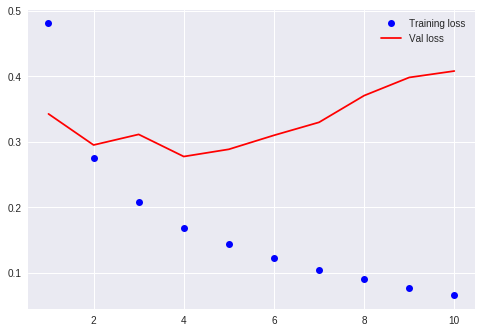

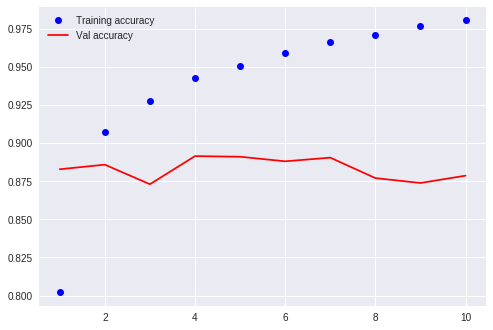

In [0]:
import matplotlib.pyplot as plt

history_dict=history.history
loss_values=history_dict['loss']
val_loss_values=history_dict['val_loss']

epochs=range(1, len(loss_values)+1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'r', label='Val loss')

plt.legend()

plt.figure()

acc_values=history_dict['acc']
val_acc_values=history_dict['val_acc']

plt.plot(epochs, acc_values, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc_values, 'r', label='Val accuracy')
plt.legend()


plt.show()

# Text data Preprocessing

##one-hot encoding

In [0]:
from keras.preprocessing.text import Tokenizer

Using TensorFlow backend.


In [0]:
samples=["The cat sat on the mat.", "The dog ate my homework."]

In [0]:
tokenizer=Tokenizer(num_words=10)
tokenizer.fit_on_texts(samples)

sequences=tokenizer.texts_to_sequences(samples)
print(sequences)

one_hot_result=tokenizer.texts_to_matrix(samples, mode='binary')
print(one_hot_result)



[[1, 2, 3, 4, 1, 5], [1, 6, 7, 8, 9]]
[[0. 1. 1. 1. 1. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 1. 1. 1. 1.]]


In [0]:
word_index=tokenizer.word_index
word_index

{'ate': 7,
 'cat': 2,
 'dog': 6,
 'homework': 9,
 'mat': 5,
 'my': 8,
 'on': 4,
 'sat': 3,
 'the': 1}

#Understanding RNN

##Simple RNN

In [0]:
##writing psudocode ##understanding the process inside RNN

import numpy as np

timesteps=100
input_features=32
output_features=64

inputs=np.random.random((timesteps, input_features))

state_t=np.zeros((output_features, ))

W=np.random.random((output_features, input_features))
U=np.random.random((output_features, output_features))
b=np.random.random((output_features,))

successive_outputs=[]
for input_t in inputs:
  output_t=np.tanh(np.dot(W, input_t)+np.dot(U, state_t)+b)
  successive_outputs.append(output_t)
  state_t=output_t
  
final_output_sequence=np.concatenate(successive_outputs, axis=0)

In [0]:
from keras.layers import SimpleRNN
## this models takes input of shape(batch_size, timesteps, input_features)


In [0]:
from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN
model=Sequential()
model.add(Embedding(10000, 32))
model.add(SimpleRNN(32))
model.summary()


Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, 32)                2080      
Total params: 322,080
Trainable params: 322,080
Non-trainable params: 0
_________________________________________________________________


In [0]:
model=Sequential()
model.add(Embedding(10000,32))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
simple_rnn_2 (SimpleRNN)     (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_3 (SimpleRNN)     (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_4 (SimpleRNN)     (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_5 (SimpleRNN)     (None, 32)                2080      
Total params: 328,320
Trainable params: 328,320
Non-trainable params: 0
_________________________________________________________________


##LSTM and GRU

In [0]:
from keras.layers import LSTM, Dense

model=Sequential()
model.add(Embedding(10000, 32))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
lstm_2 (LSTM)                (None, 32)                8320      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 33        
Total params: 328,353
Trainable params: 328,353
Non-trainable params: 0
_________________________________________________________________


# Advanced use of RNN

-Recurrent Dropout

-Stacking Recurrent layers

-Bidirectional recurrent layers

## Data Import

In [0]:
import os 
os.getcwd()

#!cd ~/content
!wget https://s3.amazonaws.com/keras-datasets/jena_climate_2009_2016.csv.zip
!unzip jena_climate_2009_2016.csv.zip

--2019-03-11 13:36:03--  https://s3.amazonaws.com/keras-datasets/jena_climate_2009_2016.csv.zip
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.216.166.45
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.216.166.45|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13568290 (13M) [application/zip]
Saving to: ‘jena_climate_2009_2016.csv.zip’

jena_climate_2009_2 100%[===================>]  12.94M  62.7MB/s    in 0.2s    

2019-03-11 13:36:03 (62.7 MB/s) - ‘jena_climate_2009_2016.csv.zip’ saved [13568290/13568290]

Archive:  jena_climate_2009_2016.csv.zip
  inflating: jena_climate_2009_2016.csv  


In [0]:
data_dir='/content'
fname=os.path.join(data_dir, 'jena_climate_2009_2016.csv')

f=open(fname)
data=f.read()
f.close

lines=data.split('\n')
header=lines[0].split(',')
lines=lines[1:]

print(header)
print(len(lines))

lines[0]

['"Date Time"', '"p (mbar)"', '"T (degC)"', '"Tpot (K)"', '"Tdew (degC)"', '"rh (%)"', '"VPmax (mbar)"', '"VPact (mbar)"', '"VPdef (mbar)"', '"sh (g/kg)"', '"H2OC (mmol/mol)"', '"rho (g/m**3)"', '"wv (m/s)"', '"max. wv (m/s)"', '"wd (deg)"']
420551


'01.01.2009 00:10:00,996.52,-8.02,265.40,-8.90,93.30,3.33,3.11,0.22,1.94,3.12,1307.75,1.03,1.75,152.30'

In [0]:
import numpy as np

float_data=np.zeros((len(lines), len(header)-1))

for i, line in enumerate(lines):
  values=[float(x) for x in line.split(',')[1:]]
  float_data[i,:]=values

In [0]:
float_data

array([[ 9.9652e+02, -8.0200e+00,  2.6540e+02, ...,  1.0300e+00,
         1.7500e+00,  1.5230e+02],
       [ 9.9657e+02, -8.4100e+00,  2.6501e+02, ...,  7.2000e-01,
         1.5000e+00,  1.3610e+02],
       [ 9.9653e+02, -8.5100e+00,  2.6491e+02, ...,  1.9000e-01,
         6.3000e-01,  1.7160e+02],
       ...,
       [ 9.9982e+02, -3.1600e+00,  2.7001e+02, ...,  1.0800e+00,
         2.0000e+00,  2.1520e+02],
       [ 9.9981e+02, -4.2300e+00,  2.6894e+02, ...,  1.4900e+00,
         2.1600e+00,  2.2580e+02],
       [ 9.9982e+02, -4.8200e+00,  2.6836e+02, ...,  1.2300e+00,
         1.9600e+00,  1.8490e+02]])

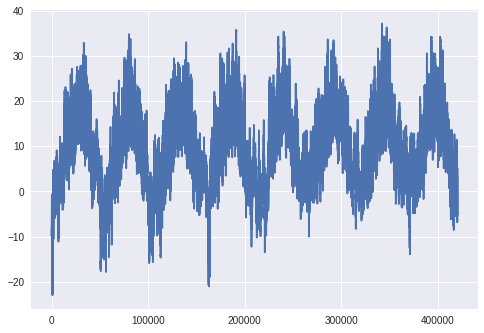

In [0]:
from matplotlib import pyplot as plt

temp=float_data[:,1]
plt.plot(range(len(temp)), temp)

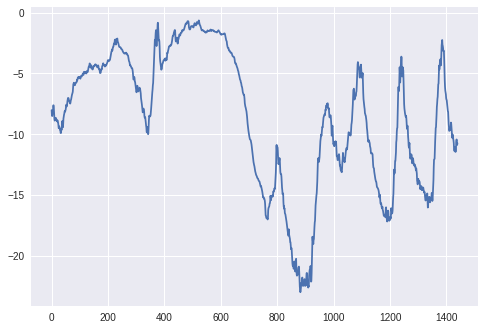

In [0]:
plt.plot(range(1440), temp[:1440])

##Preparing Data

In [0]:
# Normalization

mean=float_data[:200000].mean(axis=0)
float_data-=mean
std=float_data[:200000].std(axis=0)
float_data/=std

lookback: observations will go back 5 days

steps: Observations will be sampled at one data point per hour

delay: Targets will be 24 hours in the future

In [0]:
def generator(data,
              lookback,
              delay,
              min_index, max_index, 
              shuffle=False, batch_size=128, step=6):
  if max_index is None:
    max_index=len(data)-delay-1
    
  i=min_index+lookback
  while 1:
    if shuffle:
      rows=np.random.randint(min_index+lookback,
                             max_index, 
                             size=batch_size)
    else:
      if i+batch_size>=max_index:
        i=min_index+lookback
      rows=np.arange(i, min(i+batch_size, max_index))
      i+=len(rows)
    samples=np.zeros((len(rows), lookback//step, data.shape[-1]))
    targets=np.zeros((len(rows),))
    for j, row in enumerate(rows):
      indices=range(rows[j]-lookback, rows[j], step)
      samples[j]= data[indices]
      targets[j]=data[rows[j]+delay][1]
    yield samples, targets

In [0]:
lookback=1440
step=6
delay=144
batch_size=128

train_gen=generator(float_data, lookback=lookback, 
                   delay=delay, min_index=0, max_index=200000,
                   shuffle=True, step=step, batch_size=batch_size)
val_gen=generator(float_data, lookback=lookback, 
                  delay=delay, min_index=200001, max_index=300000,
                  step=step, batch_size=batch_size)
test_gen=generator(float_data, lookback=lookback, 
                   delay=delay, min_index=300001, max_index=None,
                   step=step, batch_size=batch_size)

val_steps=(300000-200001-lookback)
test_steps=(len(float_data)-300001-lookback)



## A common-sense, non-machine-learning baseline

In [0]:
def naive_eval():
  batch_maes=[]
  for step in range(val_steps):
    samples, targets=next(val_gen)
    preds=samples[:, -1, 1]
    mae=np.mean(np.abs(preds-targets))
    batch_maes.append(mae)
  print(np.mean(batch_maes))

naive_eval()

StopIteration: ignored

##A basic machine-learning approach

In [0]:
from keras.models import Sequential
from keras import layers
from keras.optimizers import RMSprop

model=Sequential()
model.add(layers.Flatten(input_shape=(lookback//step, float_data.shape[-1])))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(1))

model.compile(optimizer=RMSprop(), loss='mae')
history=model.fit_generator(train_gen, steps_per_epoch=500, epochs=20,
                           validation_data=val_gen,
                           validation_steps=val_steps)

Epoch 1/20
497/500 [============================>.] - ETA: 0s - loss: 1.5962

KeyboardInterrupt: ignored

In [0]:
import matplotlib.pyplot as plt

loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(1, len(loss)+1)

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()


In [0]:
##using pandas DataFrame

import pandas as pd

df=pd.read_csv('jena_climate_2009_2016.csv')
df=df.drop(["Date Time"], axis=1)

df.head()

,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
0,996.52,-8.02,265.40,-8.90,93.3,3.33,3.11,0.22,1.94,3.12,1307.75,1.03,1.75,152.3
1,996.57,-8.41,265.01,-9.28,93.4,3.23,3.02,0.21,1.89,3.03,1309.80,0.72,1.50,136.1
2,996.53,-8.51,264.91,-9.31,93.9,3.21,3.01,0.20,1.88,3.02,1310.24,0.19,0.63,171.6
3,996.51,-8.31,265.12,-9.07,94.2,3.26,3.07,0.19,1.92,3.08,1309.19,0.34,0.50,198.0
4,996.51,-8.27,265.15,-9.04,94.1,3.27,3.08,0.19,1.92,3.09,1309.00,0.32,0.63,214.3


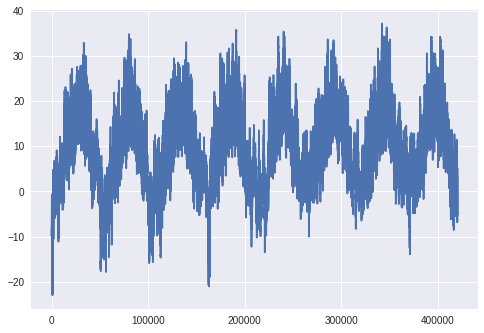

In [0]:
plt.plot(range(len(df)), df.iloc[:,1])

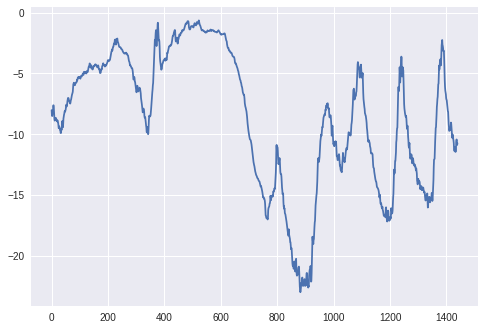

In [0]:
plt.plot(range(1440), df.iloc[:1440,1])

#Sequence processing with convnets

In [0]:
from keras.datasets import imdb
from keras.preprocessing import sequence

max_f=10000
max_len=500

(x_train, y_train), (x_test, y_test)= imdb.load_data(num_words=max_f)
x_train=sequence.pad_sequences(x_train, maxlen=max_len)
x_test=sequence.pad_sequences(x_test, maxlen=max_len)



In [0]:
x_train.shape

(25000, 500)

In [0]:
from keras.models import Sequential
from keras import layers
from keras.optimizers import RMSprop

model=Sequential()
model.add(layers.Embedding(max_f, 128, input_length=max_len))
model.add(layers.Conv1D(32,7,activation='relu'))
model.add(layers.MaxPooling1D(5))
model.add(layers.Conv1D(32, 7, activation='relu'))
model.add(layers.GlobalMaxPooling1D())
model.add(layers.Dense(1))

model.summary()

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 500, 128)          1280000   
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 494, 32)           28704     
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 98, 32)            0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 92, 32)            7200      
_________________________________________________________________
global_max_pooling1d_1 (Glob (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 33        
Total params: 1,315,937
Trainable params: 1,315,937
Non-trainable para

In [0]:
model.compile(optimizer=RMSprop(lr=1e-4),
             loss='binary_crossentropy',
             metrics=['acc'])

history=model.fit(x_train, y_train,
                 epochs=10,
                 batch_size=128,
                 validation_split=0.2)

Instructions for updating:
Use tf.cast instead.
Instructions for updating:
Deprecated in favor of operator or tf.math.divide.
Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 8s 388us/step - loss: 0.8337 - acc: 0.5092 - val_loss: 0.6874 - val_acc: 0.5642
Epoch 2/10
20000/20000 [==============================] - 3s 148us/step - loss: 0.6700 - acc: 0.6378 - val_loss: 0.6642 - val_acc: 0.6568
Epoch 3/10
20000/20000 [==============================] - 3s 148us/step - loss: 0.6236 - acc: 0.7527 - val_loss: 0.6083 - val_acc: 0.7440
Epoch 4/10
20000/20000 [==============================] - 3s 150us/step - loss: 0.5261 - acc: 0.8075 - val_loss: 0.4849 - val_acc: 0.8058
Epoch 5/10
20000/20000 [==============================] - 3s 150us/step - loss: 0.4123 - acc: 0.8479 - val_loss: 0.4258 - val_acc: 0.8326
Epoch 6/10
20000/20000 [==============================] - 3s 149us/step - loss: 0.3503 - acc: 0.8655 - val_loss: 0.4163 - val_acc: 0.83

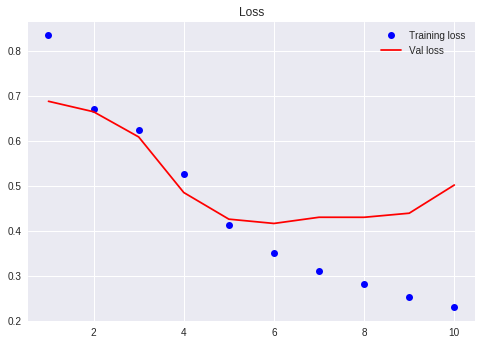

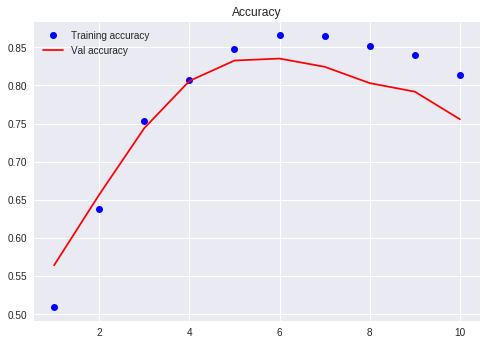

In [0]:
import matplotlib.pyplot as plt

history_dict=history.history
loss_values=history_dict['loss']
val_loss_values=history_dict['val_loss']

epochs=range(1, len(loss_values)+1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'r', label='Val loss')
plt.title('Loss')
plt.legend()

plt.figure()

acc_values=history_dict['acc']
val_acc_values=history_dict['val_acc']

plt.plot(epochs, acc_values, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc_values, 'r', label='Val accuracy')
plt.title('Accuracy')
plt.legend()


plt.show()

###Applying 1D convnet on the Jena data

In [0]:
from keras.models import Sequential
from keras import layers
from keras.optimizers import RMSprop

model=Sequential()
model.add(layers.Conv1D(32,5, activation='relu',
                       input_shape=(None, float_data.shape[-1])))
model.add(layers.MaxPooling1D(3))
model.add(layers.Conv1D(32,5,activation='relu'))
model.add(layers.MaxPooling1D(3))
model.add(layers.Conv1D(32, 5, activation='relu'))
model.add(layers.GlobalMaxPooling1D())
model.add(layers.Dense(1))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_6 (Conv1D)            (None, None, 32)          2272      
_________________________________________________________________
max_pooling1d_4 (MaxPooling1 (None, None, 32)          0         
_________________________________________________________________
conv1d_7 (Conv1D)            (None, None, 32)          5152      
_________________________________________________________________
max_pooling1d_5 (MaxPooling1 (None, None, 32)          0         
_________________________________________________________________
conv1d_8 (Conv1D)            (None, None, 32)          5152      
_________________________________________________________________
global_max_pooling1d_3 (Glob (None, 32)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 33        
Total para

In [0]:
model.compile(optimizer=RMSprop(), loss='mae')
history=model.fit_generator(train_gen,
                           steps_per_epoch=500,
                           epochs=20,
                           validation_data=val_gen,
                           validation_steps=val_steps)

In [0]:
import matplotlib.pyplot as plt

history_dict=history.history
loss_values=history_dict['loss']
val_loss_values=history_dict['val_loss']

epochs=range(1, len(loss_values)+1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'r', label='Val loss')
plt.title('Loss')
plt.legend()

plt.figure()

acc_values=history_dict['acc']
val_acc_values=history_dict['val_acc']

plt.plot(epochs, acc_values, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc_values, 'r', label='Val accuracy')
plt.title('Accuracy')
plt.legend()


plt.show()